In [19]:
import torch
import pandas as pd
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
from data_treatment import DataSet, DataAtts
from discriminator import *
from generator import *
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import glob

In [20]:
# Noise
def noise(size):
    n = Variable(torch.randn(size, 100))
    if torch.cuda.is_available(): 
        return n.cuda() 
    return n

In [3]:
files_dropdown = widgets.Dropdown(
    options=glob.glob("original_data/*.csv"),
    description='File:',
    value = 'original_data/diabetes_escalonated.csv',
    disabled=False,
)
display(files_dropdown)

Dropdown(description='File:', index=3, options=('original_data/creditcard_1s_escalonated.csv', 'original_data/…

In [26]:
file_name=files_dropdown.value
dataAtts = DataAtts(file_name)


In [27]:
def train_generator(optimizer, fake_data):
    # 2. Train Generator
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, real_data_target(prediction.size(0)))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

def train_discriminator(optimizer, real_data, fake_data):
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, real_data_target(real_data.size(0)))
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, fake_data_target(real_data.size(0)))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error
    return error_real + error_fake, prediction_real, prediction_fake

In [28]:
def real_data_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    if torch.cuda.is_available(): return data.cuda()
    return data

def fake_data_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    if torch.cuda.is_available(): return data.cuda()
    return data

In [29]:
lr = 0.0002
#lr= 0.0002
batch_size = 5
num_epochs = 5000
print_interval = 100
loss = nn.BCELoss()

In [30]:
discriminator = DiscriminatorNet(dataAtts.class_len, hidden_layers=[256])
generator = GeneratorNet(dataAtts.class_len, hidden_layers=[256])
if torch.cuda.is_available():
    discriminator.cuda()
    generator.cuda()
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)
g_optimizer = optim.Adam(generator.parameters(), lr=lr)

In [31]:
d_error_plt = [0]
g_error_plt = [0]

generated_points = []

In [32]:
database = DataSet (csv_file=file_name, root_dir=".")

data_loader = torch.utils.data.DataLoader(database, batch_size=batch_size, shuffle=True)
num_batches = len(data_loader)

In [ ]:
for epoch in range(num_epochs):
    print("Epoch ", epoch)

    for n_batch, real_batch in enumerate(data_loader):
        # 1. Train Discriminator
        real_data = Variable(real_batch).float()
        if torch.cuda.is_available(): 
            real_data = real_data.cuda()
        # Generate fake data
        fake_data = generator(noise(real_data.size(0))).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = train_discriminator(d_optimizer,
                                                                real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(real_batch.size(0)))
        generated_points.append(fake_data)
        # Train G
        g_error = train_generator(g_optimizer, fake_data)

        # Display Progress

        #if (n_batch) % print_interval == 0:
    filename = "results/" + dataAtts.fname + "/" + str(epoch) + "_" + str(n_batch) + ".txt"
    print(filename)
    file = open(filename, "w")
    print("Discriminator error: ", d_error)
    print("Generator error: ", g_error)
    print("")

    file.write("Discriminator error: " + str(d_error) + "\n")
    file.write("Generator error: " + str(g_error) + "\n")
    file.write("Points: " + str(fake_data) + "\n\n\n")

    d_error_plt.append(d_error)
    g_error_plt.append(g_error)
        #     #display.clear_output(True)
        #     # Display Images
        #     test_images = generator(test_noise).data.cpu()
        #     logger.log_images(test_images, num_test_samples, epoch, n_batch, num_batches);
        #     # Display status Logs
        #     #logger.display_status(epoch, num_epochs, n_batch, num_batches, d_error, g_error, d_pred_real, d_pred_fake)
        # # Model Checkpoints


Epoch  0
results/creditcard_1s_escalonated/0_68.txt
Discriminator error:  tensor(1.2022, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.5581, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1
results/creditcard_1s_escalonated/1_68.txt
Discriminator error:  tensor(1.5327, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6079, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2
results/creditcard_1s_escalonated/2_68.txt
Discriminator error:  tensor(1.4161, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7024, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3
results/creditcard_1s_escalonated/3_68.txt
Discriminator error:  tensor(1.1908, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8332, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  4
results/creditcard_1s_escalonated/4_68.txt
Discriminator error:  tensor(1.3934, device='cuda:0', grad_fn=<ThAdd

results/creditcard_1s_escalonated/37_68.txt
Discriminator error:  tensor(1.3931, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6882, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  38
results/creditcard_1s_escalonated/38_68.txt
Discriminator error:  tensor(1.4203, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6920, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  39
results/creditcard_1s_escalonated/39_68.txt
Discriminator error:  tensor(1.3847, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6937, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  40
results/creditcard_1s_escalonated/40_68.txt
Discriminator error:  tensor(1.4017, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6953, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  41
results/creditcard_1s_escalonated/41_68.txt
Discriminator error:  tensor(1.3575, device='cuda:0', grad_fn=<ThAdd

results/creditcard_1s_escalonated/74_68.txt
Discriminator error:  tensor(1.3730, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7220, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  75
results/creditcard_1s_escalonated/75_68.txt
Discriminator error:  tensor(1.3909, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6902, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  76
results/creditcard_1s_escalonated/76_68.txt
Discriminator error:  tensor(1.3704, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6763, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  77
results/creditcard_1s_escalonated/77_68.txt
Discriminator error:  tensor(1.3866, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7209, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  78
results/creditcard_1s_escalonated/78_68.txt
Discriminator error:  tensor(1.3810, device='cuda:0', grad_fn=<ThAdd

results/creditcard_1s_escalonated/111_68.txt
Discriminator error:  tensor(1.3934, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7073, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  112
results/creditcard_1s_escalonated/112_68.txt
Discriminator error:  tensor(1.4309, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8232, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  113
results/creditcard_1s_escalonated/113_68.txt
Discriminator error:  tensor(1.4214, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7333, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  114
results/creditcard_1s_escalonated/114_68.txt
Discriminator error:  tensor(1.3732, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7140, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  115
results/creditcard_1s_escalonated/115_68.txt
Discriminator error:  tensor(1.3899, device='cuda:0', grad_

results/creditcard_1s_escalonated/148_68.txt
Discriminator error:  tensor(1.3981, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7180, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  149
results/creditcard_1s_escalonated/149_68.txt
Discriminator error:  tensor(1.4402, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6931, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  150
results/creditcard_1s_escalonated/150_68.txt
Discriminator error:  tensor(1.3858, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6871, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  151
results/creditcard_1s_escalonated/151_68.txt
Discriminator error:  tensor(1.3498, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7065, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  152
results/creditcard_1s_escalonated/152_68.txt
Discriminator error:  tensor(1.3961, device='cuda:0', grad_

results/creditcard_1s_escalonated/185_68.txt
Discriminator error:  tensor(1.3131, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6496, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  186
results/creditcard_1s_escalonated/186_68.txt
Discriminator error:  tensor(1.3359, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7321, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  187
results/creditcard_1s_escalonated/187_68.txt
Discriminator error:  tensor(1.3260, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6458, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  188
results/creditcard_1s_escalonated/188_68.txt
Discriminator error:  tensor(1.4111, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7026, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  189
results/creditcard_1s_escalonated/189_68.txt
Discriminator error:  tensor(1.3719, device='cuda:0', grad_

results/creditcard_1s_escalonated/222_68.txt
Discriminator error:  tensor(1.4154, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6892, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  223
results/creditcard_1s_escalonated/223_68.txt
Discriminator error:  tensor(1.3731, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6825, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  224
results/creditcard_1s_escalonated/224_68.txt
Discriminator error:  tensor(1.4268, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6944, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  225
results/creditcard_1s_escalonated/225_68.txt
Discriminator error:  tensor(1.4302, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7391, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  226
results/creditcard_1s_escalonated/226_68.txt
Discriminator error:  tensor(1.2974, device='cuda:0', grad_

results/creditcard_1s_escalonated/259_68.txt
Discriminator error:  tensor(1.3857, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6907, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  260
results/creditcard_1s_escalonated/260_68.txt
Discriminator error:  tensor(1.3999, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7327, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  261
results/creditcard_1s_escalonated/261_68.txt
Discriminator error:  tensor(1.3552, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7381, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  262
results/creditcard_1s_escalonated/262_68.txt
Discriminator error:  tensor(1.4108, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6780, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  263
results/creditcard_1s_escalonated/263_68.txt
Discriminator error:  tensor(1.3792, device='cuda:0', grad_

results/creditcard_1s_escalonated/296_68.txt
Discriminator error:  tensor(1.2254, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7683, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  297
results/creditcard_1s_escalonated/297_68.txt
Discriminator error:  tensor(1.3276, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6609, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  298
results/creditcard_1s_escalonated/298_68.txt
Discriminator error:  tensor(1.3904, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6966, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  299
results/creditcard_1s_escalonated/299_68.txt
Discriminator error:  tensor(1.3084, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6856, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  300
results/creditcard_1s_escalonated/300_68.txt
Discriminator error:  tensor(1.3917, device='cuda:0', grad_

results/creditcard_1s_escalonated/333_68.txt
Discriminator error:  tensor(1.3835, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7477, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  334
results/creditcard_1s_escalonated/334_68.txt
Discriminator error:  tensor(1.3705, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7266, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  335
results/creditcard_1s_escalonated/335_68.txt
Discriminator error:  tensor(1.3958, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7016, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  336
results/creditcard_1s_escalonated/336_68.txt
Discriminator error:  tensor(1.3025, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7099, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  337
results/creditcard_1s_escalonated/337_68.txt
Discriminator error:  tensor(1.4225, device='cuda:0', grad_

results/creditcard_1s_escalonated/370_68.txt
Discriminator error:  tensor(1.3393, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7592, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  371
results/creditcard_1s_escalonated/371_68.txt
Discriminator error:  tensor(1.4270, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6846, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  372
results/creditcard_1s_escalonated/372_68.txt
Discriminator error:  tensor(1.3543, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6589, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  373
results/creditcard_1s_escalonated/373_68.txt
Discriminator error:  tensor(1.2573, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6925, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  374
results/creditcard_1s_escalonated/374_68.txt
Discriminator error:  tensor(1.3893, device='cuda:0', grad_

results/creditcard_1s_escalonated/407_68.txt
Discriminator error:  tensor(1.3976, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7643, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  408
results/creditcard_1s_escalonated/408_68.txt
Discriminator error:  tensor(1.4272, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6862, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  409
results/creditcard_1s_escalonated/409_68.txt
Discriminator error:  tensor(1.3685, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7205, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  410
results/creditcard_1s_escalonated/410_68.txt
Discriminator error:  tensor(1.3903, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6798, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  411
results/creditcard_1s_escalonated/411_68.txt
Discriminator error:  tensor(1.4309, device='cuda:0', grad_

results/creditcard_1s_escalonated/444_68.txt
Discriminator error:  tensor(1.3581, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7224, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  445
results/creditcard_1s_escalonated/445_68.txt
Discriminator error:  tensor(1.4409, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6889, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  446
results/creditcard_1s_escalonated/446_68.txt
Discriminator error:  tensor(1.3530, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7116, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  447
results/creditcard_1s_escalonated/447_68.txt
Discriminator error:  tensor(1.3628, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6480, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  448
results/creditcard_1s_escalonated/448_68.txt
Discriminator error:  tensor(1.3982, device='cuda:0', grad_

results/creditcard_1s_escalonated/481_68.txt
Discriminator error:  tensor(1.4508, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7330, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  482
results/creditcard_1s_escalonated/482_68.txt
Discriminator error:  tensor(1.3608, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6949, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  483
results/creditcard_1s_escalonated/483_68.txt
Discriminator error:  tensor(1.4207, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7079, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  484
results/creditcard_1s_escalonated/484_68.txt
Discriminator error:  tensor(1.3948, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7553, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  485
results/creditcard_1s_escalonated/485_68.txt
Discriminator error:  tensor(1.3758, device='cuda:0', grad_

results/creditcard_1s_escalonated/518_68.txt
Discriminator error:  tensor(1.2924, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7386, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  519
results/creditcard_1s_escalonated/519_68.txt
Discriminator error:  tensor(1.3825, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7268, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  520
results/creditcard_1s_escalonated/520_68.txt
Discriminator error:  tensor(1.3677, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6616, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  521
results/creditcard_1s_escalonated/521_68.txt
Discriminator error:  tensor(1.3028, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6501, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  522
results/creditcard_1s_escalonated/522_68.txt
Discriminator error:  tensor(1.3780, device='cuda:0', grad_

results/creditcard_1s_escalonated/555_68.txt
Discriminator error:  tensor(1.3939, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6368, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  556
results/creditcard_1s_escalonated/556_68.txt
Discriminator error:  tensor(1.3572, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6921, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  557
results/creditcard_1s_escalonated/557_68.txt
Discriminator error:  tensor(1.3841, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7088, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  558
results/creditcard_1s_escalonated/558_68.txt
Discriminator error:  tensor(1.4310, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6743, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  559
results/creditcard_1s_escalonated/559_68.txt
Discriminator error:  tensor(1.4592, device='cuda:0', grad_

results/creditcard_1s_escalonated/592_68.txt
Discriminator error:  tensor(1.3012, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6381, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  593
results/creditcard_1s_escalonated/593_68.txt
Discriminator error:  tensor(1.3036, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7219, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  594
results/creditcard_1s_escalonated/594_68.txt
Discriminator error:  tensor(1.4597, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7443, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  595
results/creditcard_1s_escalonated/595_68.txt
Discriminator error:  tensor(1.4505, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7712, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  596
results/creditcard_1s_escalonated/596_68.txt
Discriminator error:  tensor(1.3090, device='cuda:0', grad_

results/creditcard_1s_escalonated/629_68.txt
Discriminator error:  tensor(1.3863, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6717, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  630
results/creditcard_1s_escalonated/630_68.txt
Discriminator error:  tensor(1.4163, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6521, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  631
results/creditcard_1s_escalonated/631_68.txt
Discriminator error:  tensor(1.3443, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6594, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  632
results/creditcard_1s_escalonated/632_68.txt
Discriminator error:  tensor(1.2871, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7515, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  633
results/creditcard_1s_escalonated/633_68.txt
Discriminator error:  tensor(1.4882, device='cuda:0', grad_

results/creditcard_1s_escalonated/666_68.txt
Discriminator error:  tensor(1.4083, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6814, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  667
results/creditcard_1s_escalonated/667_68.txt
Discriminator error:  tensor(1.3925, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6853, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  668
results/creditcard_1s_escalonated/668_68.txt
Discriminator error:  tensor(1.3169, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.5953, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  669
results/creditcard_1s_escalonated/669_68.txt
Discriminator error:  tensor(1.3119, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6708, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  670
results/creditcard_1s_escalonated/670_68.txt
Discriminator error:  tensor(1.3892, device='cuda:0', grad_

results/creditcard_1s_escalonated/703_68.txt
Discriminator error:  tensor(1.3327, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6590, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  704
results/creditcard_1s_escalonated/704_68.txt
Discriminator error:  tensor(1.4075, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6884, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  705
results/creditcard_1s_escalonated/705_68.txt
Discriminator error:  tensor(1.4278, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6997, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  706
results/creditcard_1s_escalonated/706_68.txt
Discriminator error:  tensor(1.2960, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6874, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  707
results/creditcard_1s_escalonated/707_68.txt
Discriminator error:  tensor(1.2669, device='cuda:0', grad_

results/creditcard_1s_escalonated/740_68.txt
Discriminator error:  tensor(1.3764, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6946, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  741
results/creditcard_1s_escalonated/741_68.txt
Discriminator error:  tensor(1.4044, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6335, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  742
results/creditcard_1s_escalonated/742_68.txt
Discriminator error:  tensor(1.3073, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6447, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  743
results/creditcard_1s_escalonated/743_68.txt
Discriminator error:  tensor(1.4982, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7376, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  744
results/creditcard_1s_escalonated/744_68.txt
Discriminator error:  tensor(1.4140, device='cuda:0', grad_

results/creditcard_1s_escalonated/777_68.txt
Discriminator error:  tensor(1.4345, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6782, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  778
results/creditcard_1s_escalonated/778_68.txt
Discriminator error:  tensor(1.4655, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7112, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  779
results/creditcard_1s_escalonated/779_68.txt
Discriminator error:  tensor(1.3182, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7039, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  780
results/creditcard_1s_escalonated/780_68.txt
Discriminator error:  tensor(1.2664, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6859, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  781
results/creditcard_1s_escalonated/781_68.txt
Discriminator error:  tensor(1.3798, device='cuda:0', grad_

results/creditcard_1s_escalonated/814_68.txt
Discriminator error:  tensor(1.3427, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6618, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  815
results/creditcard_1s_escalonated/815_68.txt
Discriminator error:  tensor(1.3238, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7394, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  816
results/creditcard_1s_escalonated/816_68.txt
Discriminator error:  tensor(1.3480, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7387, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  817
results/creditcard_1s_escalonated/817_68.txt
Discriminator error:  tensor(1.3455, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6948, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  818
results/creditcard_1s_escalonated/818_68.txt
Discriminator error:  tensor(1.3908, device='cuda:0', grad_

results/creditcard_1s_escalonated/851_68.txt
Discriminator error:  tensor(1.3923, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6498, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  852
results/creditcard_1s_escalonated/852_68.txt
Discriminator error:  tensor(1.2620, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7286, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  853
results/creditcard_1s_escalonated/853_68.txt
Discriminator error:  tensor(1.4308, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8190, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  854
results/creditcard_1s_escalonated/854_68.txt
Discriminator error:  tensor(1.3424, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8078, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  855
results/creditcard_1s_escalonated/855_68.txt
Discriminator error:  tensor(1.3655, device='cuda:0', grad_

results/creditcard_1s_escalonated/888_68.txt
Discriminator error:  tensor(1.4802, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6999, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  889
results/creditcard_1s_escalonated/889_68.txt
Discriminator error:  tensor(1.2951, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7193, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  890
results/creditcard_1s_escalonated/890_68.txt
Discriminator error:  tensor(1.3261, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7721, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  891
results/creditcard_1s_escalonated/891_68.txt
Discriminator error:  tensor(1.3622, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7219, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  892
results/creditcard_1s_escalonated/892_68.txt
Discriminator error:  tensor(1.3701, device='cuda:0', grad_

results/creditcard_1s_escalonated/925_68.txt
Discriminator error:  tensor(1.2215, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6750, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  926
results/creditcard_1s_escalonated/926_68.txt
Discriminator error:  tensor(1.3748, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7185, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  927
results/creditcard_1s_escalonated/927_68.txt
Discriminator error:  tensor(1.4665, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7199, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  928
results/creditcard_1s_escalonated/928_68.txt
Discriminator error:  tensor(1.4299, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6834, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  929
results/creditcard_1s_escalonated/929_68.txt
Discriminator error:  tensor(1.4331, device='cuda:0', grad_

results/creditcard_1s_escalonated/962_68.txt
Discriminator error:  tensor(1.3705, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6697, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  963
results/creditcard_1s_escalonated/963_68.txt
Discriminator error:  tensor(1.2896, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7164, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  964
results/creditcard_1s_escalonated/964_68.txt
Discriminator error:  tensor(1.4164, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7870, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  965
results/creditcard_1s_escalonated/965_68.txt
Discriminator error:  tensor(1.3604, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8084, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  966
results/creditcard_1s_escalonated/966_68.txt
Discriminator error:  tensor(1.3132, device='cuda:0', grad_

results/creditcard_1s_escalonated/999_68.txt
Discriminator error:  tensor(1.2832, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6442, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1000
results/creditcard_1s_escalonated/1000_68.txt
Discriminator error:  tensor(1.3761, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6854, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1001
results/creditcard_1s_escalonated/1001_68.txt
Discriminator error:  tensor(1.3968, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6313, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1002
results/creditcard_1s_escalonated/1002_68.txt
Discriminator error:  tensor(1.3987, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6919, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1003
results/creditcard_1s_escalonated/1003_68.txt
Discriminator error:  tensor(1.3361, device='cuda:0

results/creditcard_1s_escalonated/1036_68.txt
Discriminator error:  tensor(1.2518, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6993, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1037
results/creditcard_1s_escalonated/1037_68.txt
Discriminator error:  tensor(1.3591, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6979, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1038
results/creditcard_1s_escalonated/1038_68.txt
Discriminator error:  tensor(1.2923, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6521, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1039
results/creditcard_1s_escalonated/1039_68.txt
Discriminator error:  tensor(1.3943, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7714, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1040
results/creditcard_1s_escalonated/1040_68.txt
Discriminator error:  tensor(1.3179, device='cuda:

results/creditcard_1s_escalonated/1073_68.txt
Discriminator error:  tensor(1.3823, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6504, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1074
results/creditcard_1s_escalonated/1074_68.txt
Discriminator error:  tensor(1.2703, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.5788, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1075
results/creditcard_1s_escalonated/1075_68.txt
Discriminator error:  tensor(1.3681, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7086, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1076
results/creditcard_1s_escalonated/1076_68.txt
Discriminator error:  tensor(1.2691, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8108, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1077
results/creditcard_1s_escalonated/1077_68.txt
Discriminator error:  tensor(1.3547, device='cuda:

results/creditcard_1s_escalonated/1110_68.txt
Discriminator error:  tensor(1.3825, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6388, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1111
results/creditcard_1s_escalonated/1111_68.txt
Discriminator error:  tensor(1.4288, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6711, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1112
results/creditcard_1s_escalonated/1112_68.txt
Discriminator error:  tensor(1.3322, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7026, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1113
results/creditcard_1s_escalonated/1113_68.txt
Discriminator error:  tensor(1.4554, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6945, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1114
results/creditcard_1s_escalonated/1114_68.txt
Discriminator error:  tensor(1.3984, device='cuda:

results/creditcard_1s_escalonated/1147_68.txt
Discriminator error:  tensor(1.4387, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7099, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1148
results/creditcard_1s_escalonated/1148_68.txt
Discriminator error:  tensor(1.3526, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6739, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1149
results/creditcard_1s_escalonated/1149_68.txt
Discriminator error:  tensor(1.4814, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6651, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1150
results/creditcard_1s_escalonated/1150_68.txt
Discriminator error:  tensor(1.5231, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7211, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1151
results/creditcard_1s_escalonated/1151_68.txt
Discriminator error:  tensor(1.3588, device='cuda:

results/creditcard_1s_escalonated/1184_68.txt
Discriminator error:  tensor(1.3557, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6713, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1185
results/creditcard_1s_escalonated/1185_68.txt
Discriminator error:  tensor(1.5504, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7503, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1186
results/creditcard_1s_escalonated/1186_68.txt
Discriminator error:  tensor(1.4364, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7303, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1187
results/creditcard_1s_escalonated/1187_68.txt
Discriminator error:  tensor(1.3891, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7679, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1188
results/creditcard_1s_escalonated/1188_68.txt
Discriminator error:  tensor(1.3351, device='cuda:

results/creditcard_1s_escalonated/1221_68.txt
Discriminator error:  tensor(1.3447, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7985, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1222
results/creditcard_1s_escalonated/1222_68.txt
Discriminator error:  tensor(1.4174, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6727, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1223
results/creditcard_1s_escalonated/1223_68.txt
Discriminator error:  tensor(1.4415, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7402, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1224
results/creditcard_1s_escalonated/1224_68.txt
Discriminator error:  tensor(1.3264, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7266, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1225
results/creditcard_1s_escalonated/1225_68.txt
Discriminator error:  tensor(1.2373, device='cuda:

results/creditcard_1s_escalonated/1258_68.txt
Discriminator error:  tensor(1.2422, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6830, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1259
results/creditcard_1s_escalonated/1259_68.txt
Discriminator error:  tensor(1.3800, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7940, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1260
results/creditcard_1s_escalonated/1260_68.txt
Discriminator error:  tensor(1.4580, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7713, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1261
results/creditcard_1s_escalonated/1261_68.txt
Discriminator error:  tensor(1.4604, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6705, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1262
results/creditcard_1s_escalonated/1262_68.txt
Discriminator error:  tensor(1.3275, device='cuda:

results/creditcard_1s_escalonated/1295_68.txt
Discriminator error:  tensor(1.2987, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7280, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1296
results/creditcard_1s_escalonated/1296_68.txt
Discriminator error:  tensor(1.4940, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7601, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1297
results/creditcard_1s_escalonated/1297_68.txt
Discriminator error:  tensor(1.3219, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6893, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1298
results/creditcard_1s_escalonated/1298_68.txt
Discriminator error:  tensor(1.3079, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7592, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1299
results/creditcard_1s_escalonated/1299_68.txt
Discriminator error:  tensor(1.3459, device='cuda:

results/creditcard_1s_escalonated/1332_68.txt
Discriminator error:  tensor(1.4601, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7497, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1333
results/creditcard_1s_escalonated/1333_68.txt
Discriminator error:  tensor(1.2050, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6090, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1334
results/creditcard_1s_escalonated/1334_68.txt
Discriminator error:  tensor(1.5211, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8059, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1335
results/creditcard_1s_escalonated/1335_68.txt
Discriminator error:  tensor(1.4970, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6467, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1336
results/creditcard_1s_escalonated/1336_68.txt
Discriminator error:  tensor(1.3554, device='cuda:

results/creditcard_1s_escalonated/1369_68.txt
Discriminator error:  tensor(1.3772, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7094, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1370
results/creditcard_1s_escalonated/1370_68.txt
Discriminator error:  tensor(1.4411, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7392, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1371
results/creditcard_1s_escalonated/1371_68.txt
Discriminator error:  tensor(1.2214, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7427, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1372
results/creditcard_1s_escalonated/1372_68.txt
Discriminator error:  tensor(1.4727, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6937, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1373
results/creditcard_1s_escalonated/1373_68.txt
Discriminator error:  tensor(1.3248, device='cuda:

results/creditcard_1s_escalonated/1406_68.txt
Discriminator error:  tensor(1.4066, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6655, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1407
results/creditcard_1s_escalonated/1407_68.txt
Discriminator error:  tensor(1.4277, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7290, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1408
results/creditcard_1s_escalonated/1408_68.txt
Discriminator error:  tensor(1.2391, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7135, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1409
results/creditcard_1s_escalonated/1409_68.txt
Discriminator error:  tensor(1.2830, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7068, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1410
results/creditcard_1s_escalonated/1410_68.txt
Discriminator error:  tensor(1.2342, device='cuda:

results/creditcard_1s_escalonated/1443_68.txt
Discriminator error:  tensor(1.2720, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6957, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1444
results/creditcard_1s_escalonated/1444_68.txt
Discriminator error:  tensor(1.3903, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6561, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1445
results/creditcard_1s_escalonated/1445_68.txt
Discriminator error:  tensor(1.4403, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7161, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1446
results/creditcard_1s_escalonated/1446_68.txt
Discriminator error:  tensor(1.3736, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7025, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1447
results/creditcard_1s_escalonated/1447_68.txt
Discriminator error:  tensor(1.3406, device='cuda:

results/creditcard_1s_escalonated/1480_68.txt
Discriminator error:  tensor(1.4183, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6888, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1481
results/creditcard_1s_escalonated/1481_68.txt
Discriminator error:  tensor(1.4575, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7433, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1482
results/creditcard_1s_escalonated/1482_68.txt
Discriminator error:  tensor(1.3566, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6587, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1483
results/creditcard_1s_escalonated/1483_68.txt
Discriminator error:  tensor(1.2926, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6052, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1484
results/creditcard_1s_escalonated/1484_68.txt
Discriminator error:  tensor(1.2797, device='cuda:

results/creditcard_1s_escalonated/1517_68.txt
Discriminator error:  tensor(1.2770, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7411, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1518
results/creditcard_1s_escalonated/1518_68.txt
Discriminator error:  tensor(1.4879, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6520, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1519
results/creditcard_1s_escalonated/1519_68.txt
Discriminator error:  tensor(1.4989, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7174, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1520
results/creditcard_1s_escalonated/1520_68.txt
Discriminator error:  tensor(1.2827, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6794, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1521
results/creditcard_1s_escalonated/1521_68.txt
Discriminator error:  tensor(1.2251, device='cuda:

results/creditcard_1s_escalonated/1554_68.txt
Discriminator error:  tensor(1.4656, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6837, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1555
results/creditcard_1s_escalonated/1555_68.txt
Discriminator error:  tensor(1.2966, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6679, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1556
results/creditcard_1s_escalonated/1556_68.txt
Discriminator error:  tensor(1.3262, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7017, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1557
results/creditcard_1s_escalonated/1557_68.txt
Discriminator error:  tensor(1.4323, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6979, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1558
results/creditcard_1s_escalonated/1558_68.txt
Discriminator error:  tensor(1.4017, device='cuda:

results/creditcard_1s_escalonated/1591_68.txt
Discriminator error:  tensor(1.3837, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7192, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1592
results/creditcard_1s_escalonated/1592_68.txt
Discriminator error:  tensor(1.3718, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6680, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1593
results/creditcard_1s_escalonated/1593_68.txt
Discriminator error:  tensor(1.4390, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7203, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1594
results/creditcard_1s_escalonated/1594_68.txt
Discriminator error:  tensor(1.3685, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6932, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1595
results/creditcard_1s_escalonated/1595_68.txt
Discriminator error:  tensor(1.4001, device='cuda:

results/creditcard_1s_escalonated/1628_68.txt
Discriminator error:  tensor(1.4729, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6797, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1629
results/creditcard_1s_escalonated/1629_68.txt
Discriminator error:  tensor(1.4577, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8475, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1630
results/creditcard_1s_escalonated/1630_68.txt
Discriminator error:  tensor(1.4194, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6213, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1631
results/creditcard_1s_escalonated/1631_68.txt
Discriminator error:  tensor(1.3425, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7476, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1632
results/creditcard_1s_escalonated/1632_68.txt
Discriminator error:  tensor(1.3929, device='cuda:

results/creditcard_1s_escalonated/1665_68.txt
Discriminator error:  tensor(1.3839, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8156, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1666
results/creditcard_1s_escalonated/1666_68.txt
Discriminator error:  tensor(1.4081, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6084, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1667
results/creditcard_1s_escalonated/1667_68.txt
Discriminator error:  tensor(1.4098, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6818, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1668
results/creditcard_1s_escalonated/1668_68.txt
Discriminator error:  tensor(1.3531, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7701, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1669
results/creditcard_1s_escalonated/1669_68.txt
Discriminator error:  tensor(1.3163, device='cuda:

results/creditcard_1s_escalonated/1702_68.txt
Discriminator error:  tensor(1.3743, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6803, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1703
results/creditcard_1s_escalonated/1703_68.txt
Discriminator error:  tensor(1.4681, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7119, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1704
results/creditcard_1s_escalonated/1704_68.txt
Discriminator error:  tensor(1.3164, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6993, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1705
results/creditcard_1s_escalonated/1705_68.txt
Discriminator error:  tensor(1.5527, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6625, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1706
results/creditcard_1s_escalonated/1706_68.txt
Discriminator error:  tensor(1.3175, device='cuda:

results/creditcard_1s_escalonated/1739_68.txt
Discriminator error:  tensor(1.3385, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8037, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1740
results/creditcard_1s_escalonated/1740_68.txt
Discriminator error:  tensor(1.2799, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6906, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1741
results/creditcard_1s_escalonated/1741_68.txt
Discriminator error:  tensor(1.3290, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8005, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1742
results/creditcard_1s_escalonated/1742_68.txt
Discriminator error:  tensor(1.3267, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7282, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1743
results/creditcard_1s_escalonated/1743_68.txt
Discriminator error:  tensor(1.4471, device='cuda:

results/creditcard_1s_escalonated/1776_68.txt
Discriminator error:  tensor(1.5442, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6915, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1777
results/creditcard_1s_escalonated/1777_68.txt
Discriminator error:  tensor(1.3182, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6898, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1778
results/creditcard_1s_escalonated/1778_68.txt
Discriminator error:  tensor(1.3429, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7323, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1779
results/creditcard_1s_escalonated/1779_68.txt
Discriminator error:  tensor(1.3808, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6591, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1780
results/creditcard_1s_escalonated/1780_68.txt
Discriminator error:  tensor(1.2757, device='cuda:

results/creditcard_1s_escalonated/1813_68.txt
Discriminator error:  tensor(1.4551, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6530, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1814
results/creditcard_1s_escalonated/1814_68.txt
Discriminator error:  tensor(1.3762, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6476, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1815
results/creditcard_1s_escalonated/1815_68.txt
Discriminator error:  tensor(1.5740, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6844, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1816
results/creditcard_1s_escalonated/1816_68.txt
Discriminator error:  tensor(1.5096, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6746, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1817
results/creditcard_1s_escalonated/1817_68.txt
Discriminator error:  tensor(1.2982, device='cuda:

results/creditcard_1s_escalonated/1850_68.txt
Discriminator error:  tensor(1.3723, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6852, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1851
results/creditcard_1s_escalonated/1851_68.txt
Discriminator error:  tensor(1.3215, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7547, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1852
results/creditcard_1s_escalonated/1852_68.txt
Discriminator error:  tensor(1.5122, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7309, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1853
results/creditcard_1s_escalonated/1853_68.txt
Discriminator error:  tensor(1.3005, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7434, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1854
results/creditcard_1s_escalonated/1854_68.txt
Discriminator error:  tensor(1.4054, device='cuda:

results/creditcard_1s_escalonated/1887_68.txt
Discriminator error:  tensor(1.4305, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7446, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1888
results/creditcard_1s_escalonated/1888_68.txt
Discriminator error:  tensor(1.3139, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7111, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1889
results/creditcard_1s_escalonated/1889_68.txt
Discriminator error:  tensor(1.4645, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7271, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1890
results/creditcard_1s_escalonated/1890_68.txt
Discriminator error:  tensor(1.3986, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6730, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1891
results/creditcard_1s_escalonated/1891_68.txt
Discriminator error:  tensor(1.3399, device='cuda:

results/creditcard_1s_escalonated/1924_68.txt
Discriminator error:  tensor(1.3693, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6676, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1925
results/creditcard_1s_escalonated/1925_68.txt
Discriminator error:  tensor(1.3820, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7311, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1926
results/creditcard_1s_escalonated/1926_68.txt
Discriminator error:  tensor(1.5043, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7245, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1927
results/creditcard_1s_escalonated/1927_68.txt
Discriminator error:  tensor(1.4352, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7185, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1928
results/creditcard_1s_escalonated/1928_68.txt
Discriminator error:  tensor(1.3045, device='cuda:

results/creditcard_1s_escalonated/1961_68.txt
Discriminator error:  tensor(1.4318, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6637, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1962
results/creditcard_1s_escalonated/1962_68.txt
Discriminator error:  tensor(1.3691, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.5882, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1963
results/creditcard_1s_escalonated/1963_68.txt
Discriminator error:  tensor(1.3807, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8044, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1964
results/creditcard_1s_escalonated/1964_68.txt
Discriminator error:  tensor(1.3369, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6855, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1965
results/creditcard_1s_escalonated/1965_68.txt
Discriminator error:  tensor(1.3379, device='cuda:

results/creditcard_1s_escalonated/1998_68.txt
Discriminator error:  tensor(1.2666, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6987, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  1999
results/creditcard_1s_escalonated/1999_68.txt
Discriminator error:  tensor(1.4585, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7523, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2000
results/creditcard_1s_escalonated/2000_68.txt
Discriminator error:  tensor(1.2867, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6469, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2001
results/creditcard_1s_escalonated/2001_68.txt
Discriminator error:  tensor(1.5054, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7001, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2002
results/creditcard_1s_escalonated/2002_68.txt
Discriminator error:  tensor(1.3905, device='cuda:

results/creditcard_1s_escalonated/2035_68.txt
Discriminator error:  tensor(1.5387, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6483, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2036
results/creditcard_1s_escalonated/2036_68.txt
Discriminator error:  tensor(1.3754, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7324, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2037
results/creditcard_1s_escalonated/2037_68.txt
Discriminator error:  tensor(1.3609, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7183, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2038
results/creditcard_1s_escalonated/2038_68.txt
Discriminator error:  tensor(1.2411, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6997, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2039
results/creditcard_1s_escalonated/2039_68.txt
Discriminator error:  tensor(1.2829, device='cuda:

results/creditcard_1s_escalonated/2072_68.txt
Discriminator error:  tensor(1.3518, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7162, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2073
results/creditcard_1s_escalonated/2073_68.txt
Discriminator error:  tensor(1.3552, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6067, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2074
results/creditcard_1s_escalonated/2074_68.txt
Discriminator error:  tensor(1.3345, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6445, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2075
results/creditcard_1s_escalonated/2075_68.txt
Discriminator error:  tensor(1.3666, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7570, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2076
results/creditcard_1s_escalonated/2076_68.txt
Discriminator error:  tensor(1.4618, device='cuda:

results/creditcard_1s_escalonated/2109_68.txt
Discriminator error:  tensor(1.3611, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6838, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2110
results/creditcard_1s_escalonated/2110_68.txt
Discriminator error:  tensor(1.3755, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6532, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2111
results/creditcard_1s_escalonated/2111_68.txt
Discriminator error:  tensor(1.3746, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7247, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2112
results/creditcard_1s_escalonated/2112_68.txt
Discriminator error:  tensor(1.4150, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6861, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2113
results/creditcard_1s_escalonated/2113_68.txt
Discriminator error:  tensor(1.3713, device='cuda:

results/creditcard_1s_escalonated/2146_68.txt
Discriminator error:  tensor(1.3313, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6475, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2147
results/creditcard_1s_escalonated/2147_68.txt
Discriminator error:  tensor(1.2813, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7894, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2148
results/creditcard_1s_escalonated/2148_68.txt
Discriminator error:  tensor(1.3951, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7937, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2149
results/creditcard_1s_escalonated/2149_68.txt
Discriminator error:  tensor(1.3983, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6488, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2150
results/creditcard_1s_escalonated/2150_68.txt
Discriminator error:  tensor(1.4698, device='cuda:

results/creditcard_1s_escalonated/2183_68.txt
Discriminator error:  tensor(1.3611, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7371, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2184
results/creditcard_1s_escalonated/2184_68.txt
Discriminator error:  tensor(1.3594, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8244, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2185
results/creditcard_1s_escalonated/2185_68.txt
Discriminator error:  tensor(1.4576, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6552, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2186
results/creditcard_1s_escalonated/2186_68.txt
Discriminator error:  tensor(1.3425, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7383, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2187
results/creditcard_1s_escalonated/2187_68.txt
Discriminator error:  tensor(1.5192, device='cuda:

results/creditcard_1s_escalonated/2220_68.txt
Discriminator error:  tensor(1.4204, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7832, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2221
results/creditcard_1s_escalonated/2221_68.txt
Discriminator error:  tensor(1.2895, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7005, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2222
results/creditcard_1s_escalonated/2222_68.txt
Discriminator error:  tensor(1.4971, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7247, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2223
results/creditcard_1s_escalonated/2223_68.txt
Discriminator error:  tensor(1.4037, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7878, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2224
results/creditcard_1s_escalonated/2224_68.txt
Discriminator error:  tensor(1.2430, device='cuda:

results/creditcard_1s_escalonated/2257_68.txt
Discriminator error:  tensor(1.3210, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7172, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2258
results/creditcard_1s_escalonated/2258_68.txt
Discriminator error:  tensor(1.5606, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6938, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2259
results/creditcard_1s_escalonated/2259_68.txt
Discriminator error:  tensor(1.3252, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6857, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2260
results/creditcard_1s_escalonated/2260_68.txt
Discriminator error:  tensor(1.2971, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7163, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2261
results/creditcard_1s_escalonated/2261_68.txt
Discriminator error:  tensor(1.4169, device='cuda:

results/creditcard_1s_escalonated/2294_68.txt
Discriminator error:  tensor(1.4170, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6432, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2295
results/creditcard_1s_escalonated/2295_68.txt
Discriminator error:  tensor(1.4100, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6886, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2296
results/creditcard_1s_escalonated/2296_68.txt
Discriminator error:  tensor(1.4433, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6901, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2297
results/creditcard_1s_escalonated/2297_68.txt
Discriminator error:  tensor(1.5053, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7098, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2298
results/creditcard_1s_escalonated/2298_68.txt
Discriminator error:  tensor(1.4425, device='cuda:

results/creditcard_1s_escalonated/2331_68.txt
Discriminator error:  tensor(1.3563, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6397, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2332
results/creditcard_1s_escalonated/2332_68.txt
Discriminator error:  tensor(1.3316, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6985, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2333
results/creditcard_1s_escalonated/2333_68.txt
Discriminator error:  tensor(1.5371, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7048, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2334
results/creditcard_1s_escalonated/2334_68.txt
Discriminator error:  tensor(1.3768, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7319, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2335
results/creditcard_1s_escalonated/2335_68.txt
Discriminator error:  tensor(1.4299, device='cuda:

results/creditcard_1s_escalonated/2368_68.txt
Discriminator error:  tensor(1.1928, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7796, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2369
results/creditcard_1s_escalonated/2369_68.txt
Discriminator error:  tensor(1.3763, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7872, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2370
results/creditcard_1s_escalonated/2370_68.txt
Discriminator error:  tensor(1.4816, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7548, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2371
results/creditcard_1s_escalonated/2371_68.txt
Discriminator error:  tensor(1.3571, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6346, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2372
results/creditcard_1s_escalonated/2372_68.txt
Discriminator error:  tensor(1.4600, device='cuda:

results/creditcard_1s_escalonated/2405_68.txt
Discriminator error:  tensor(1.4054, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7290, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2406
results/creditcard_1s_escalonated/2406_68.txt
Discriminator error:  tensor(1.5303, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7014, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2407
results/creditcard_1s_escalonated/2407_68.txt
Discriminator error:  tensor(1.2254, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7242, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2408
results/creditcard_1s_escalonated/2408_68.txt
Discriminator error:  tensor(1.4703, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7538, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2409
results/creditcard_1s_escalonated/2409_68.txt
Discriminator error:  tensor(1.3053, device='cuda:

results/creditcard_1s_escalonated/2442_68.txt
Discriminator error:  tensor(1.4144, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.5699, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2443
results/creditcard_1s_escalonated/2443_68.txt
Discriminator error:  tensor(1.4470, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.5836, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2444
results/creditcard_1s_escalonated/2444_68.txt
Discriminator error:  tensor(1.3537, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6609, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2445
results/creditcard_1s_escalonated/2445_68.txt
Discriminator error:  tensor(1.3392, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6959, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2446
results/creditcard_1s_escalonated/2446_68.txt
Discriminator error:  tensor(1.3438, device='cuda:

results/creditcard_1s_escalonated/2479_68.txt
Discriminator error:  tensor(1.3166, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7082, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2480
results/creditcard_1s_escalonated/2480_68.txt
Discriminator error:  tensor(1.5058, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6989, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2481
results/creditcard_1s_escalonated/2481_68.txt
Discriminator error:  tensor(1.4578, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7148, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2482
results/creditcard_1s_escalonated/2482_68.txt
Discriminator error:  tensor(1.3411, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6554, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2483
results/creditcard_1s_escalonated/2483_68.txt
Discriminator error:  tensor(1.3433, device='cuda:

results/creditcard_1s_escalonated/2516_68.txt
Discriminator error:  tensor(1.3347, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6468, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2517
results/creditcard_1s_escalonated/2517_68.txt
Discriminator error:  tensor(1.3651, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6991, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2518
results/creditcard_1s_escalonated/2518_68.txt
Discriminator error:  tensor(1.4101, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7632, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2519
results/creditcard_1s_escalonated/2519_68.txt
Discriminator error:  tensor(1.3989, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7242, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2520
results/creditcard_1s_escalonated/2520_68.txt
Discriminator error:  tensor(1.4524, device='cuda:

results/creditcard_1s_escalonated/2553_68.txt
Discriminator error:  tensor(1.3850, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7153, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2554
results/creditcard_1s_escalonated/2554_68.txt
Discriminator error:  tensor(1.4314, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6904, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2555
results/creditcard_1s_escalonated/2555_68.txt
Discriminator error:  tensor(1.3952, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7320, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2556
results/creditcard_1s_escalonated/2556_68.txt
Discriminator error:  tensor(1.4753, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6846, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2557
results/creditcard_1s_escalonated/2557_68.txt
Discriminator error:  tensor(1.3499, device='cuda:

results/creditcard_1s_escalonated/2590_68.txt
Discriminator error:  tensor(1.4899, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7152, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2591
results/creditcard_1s_escalonated/2591_68.txt
Discriminator error:  tensor(1.3302, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8250, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2592
results/creditcard_1s_escalonated/2592_68.txt
Discriminator error:  tensor(1.3367, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6718, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2593
results/creditcard_1s_escalonated/2593_68.txt
Discriminator error:  tensor(1.4355, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7988, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2594
results/creditcard_1s_escalonated/2594_68.txt
Discriminator error:  tensor(1.4357, device='cuda:

results/creditcard_1s_escalonated/2627_68.txt
Discriminator error:  tensor(1.3716, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7929, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2628
results/creditcard_1s_escalonated/2628_68.txt
Discriminator error:  tensor(1.4614, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7429, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2629
results/creditcard_1s_escalonated/2629_68.txt
Discriminator error:  tensor(1.3934, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6305, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2630
results/creditcard_1s_escalonated/2630_68.txt
Discriminator error:  tensor(1.4225, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7395, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2631
results/creditcard_1s_escalonated/2631_68.txt
Discriminator error:  tensor(1.4578, device='cuda:

results/creditcard_1s_escalonated/2664_68.txt
Discriminator error:  tensor(1.2415, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6745, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2665
results/creditcard_1s_escalonated/2665_68.txt
Discriminator error:  tensor(1.3673, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6577, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2666
results/creditcard_1s_escalonated/2666_68.txt
Discriminator error:  tensor(1.3341, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7600, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2667
results/creditcard_1s_escalonated/2667_68.txt
Discriminator error:  tensor(1.3689, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7283, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2668
results/creditcard_1s_escalonated/2668_68.txt
Discriminator error:  tensor(1.3100, device='cuda:

results/creditcard_1s_escalonated/2701_68.txt
Discriminator error:  tensor(1.3709, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7366, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2702
results/creditcard_1s_escalonated/2702_68.txt
Discriminator error:  tensor(1.4676, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7850, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2703
results/creditcard_1s_escalonated/2703_68.txt
Discriminator error:  tensor(1.4122, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7274, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2704
results/creditcard_1s_escalonated/2704_68.txt
Discriminator error:  tensor(1.3533, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7140, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2705
results/creditcard_1s_escalonated/2705_68.txt
Discriminator error:  tensor(1.3277, device='cuda:

results/creditcard_1s_escalonated/2738_68.txt
Discriminator error:  tensor(1.3791, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6955, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2739
results/creditcard_1s_escalonated/2739_68.txt
Discriminator error:  tensor(1.4465, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8084, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2740
results/creditcard_1s_escalonated/2740_68.txt
Discriminator error:  tensor(1.3875, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7094, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2741
results/creditcard_1s_escalonated/2741_68.txt
Discriminator error:  tensor(1.3788, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8077, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2742
results/creditcard_1s_escalonated/2742_68.txt
Discriminator error:  tensor(1.5518, device='cuda:

results/creditcard_1s_escalonated/2775_68.txt
Discriminator error:  tensor(1.3526, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6424, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2776
results/creditcard_1s_escalonated/2776_68.txt
Discriminator error:  tensor(1.3091, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6275, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2777
results/creditcard_1s_escalonated/2777_68.txt
Discriminator error:  tensor(1.4116, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6082, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2778
results/creditcard_1s_escalonated/2778_68.txt
Discriminator error:  tensor(1.2609, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7706, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2779
results/creditcard_1s_escalonated/2779_68.txt
Discriminator error:  tensor(1.2774, device='cuda:

results/creditcard_1s_escalonated/2812_68.txt
Discriminator error:  tensor(1.3272, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6361, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2813
results/creditcard_1s_escalonated/2813_68.txt
Discriminator error:  tensor(1.2909, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7674, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2814
results/creditcard_1s_escalonated/2814_68.txt
Discriminator error:  tensor(1.3571, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6740, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2815
results/creditcard_1s_escalonated/2815_68.txt
Discriminator error:  tensor(1.4666, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6706, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2816
results/creditcard_1s_escalonated/2816_68.txt
Discriminator error:  tensor(1.3438, device='cuda:

results/creditcard_1s_escalonated/2849_68.txt
Discriminator error:  tensor(1.3951, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6710, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2850
results/creditcard_1s_escalonated/2850_68.txt
Discriminator error:  tensor(1.3882, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7052, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2851
results/creditcard_1s_escalonated/2851_68.txt
Discriminator error:  tensor(1.5001, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7348, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2852
results/creditcard_1s_escalonated/2852_68.txt
Discriminator error:  tensor(1.4240, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7022, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2853
results/creditcard_1s_escalonated/2853_68.txt
Discriminator error:  tensor(1.4709, device='cuda:

results/creditcard_1s_escalonated/2886_68.txt
Discriminator error:  tensor(1.3723, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7420, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2887
results/creditcard_1s_escalonated/2887_68.txt
Discriminator error:  tensor(1.4660, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6540, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2888
results/creditcard_1s_escalonated/2888_68.txt
Discriminator error:  tensor(1.3923, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7865, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2889
results/creditcard_1s_escalonated/2889_68.txt
Discriminator error:  tensor(1.3913, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6302, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2890
results/creditcard_1s_escalonated/2890_68.txt
Discriminator error:  tensor(1.4787, device='cuda:

results/creditcard_1s_escalonated/2923_68.txt
Discriminator error:  tensor(1.3845, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7311, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2924
results/creditcard_1s_escalonated/2924_68.txt
Discriminator error:  tensor(1.4477, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7718, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2925
results/creditcard_1s_escalonated/2925_68.txt
Discriminator error:  tensor(1.3916, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6438, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2926
results/creditcard_1s_escalonated/2926_68.txt
Discriminator error:  tensor(1.5081, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6563, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2927
results/creditcard_1s_escalonated/2927_68.txt
Discriminator error:  tensor(1.2899, device='cuda:

results/creditcard_1s_escalonated/2960_68.txt
Discriminator error:  tensor(1.3862, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6524, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2961
results/creditcard_1s_escalonated/2961_68.txt
Discriminator error:  tensor(1.3310, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7552, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2962
results/creditcard_1s_escalonated/2962_68.txt
Discriminator error:  tensor(1.2936, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7068, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2963
results/creditcard_1s_escalonated/2963_68.txt
Discriminator error:  tensor(1.5471, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6263, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2964
results/creditcard_1s_escalonated/2964_68.txt
Discriminator error:  tensor(1.2954, device='cuda:

results/creditcard_1s_escalonated/2997_68.txt
Discriminator error:  tensor(1.4263, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6214, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2998
results/creditcard_1s_escalonated/2998_68.txt
Discriminator error:  tensor(1.2728, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7512, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  2999
results/creditcard_1s_escalonated/2999_68.txt
Discriminator error:  tensor(1.2251, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7801, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3000
results/creditcard_1s_escalonated/3000_68.txt
Discriminator error:  tensor(1.4185, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7281, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3001
results/creditcard_1s_escalonated/3001_68.txt
Discriminator error:  tensor(1.3928, device='cuda:

results/creditcard_1s_escalonated/3034_68.txt
Discriminator error:  tensor(1.3187, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6506, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3035
results/creditcard_1s_escalonated/3035_68.txt
Discriminator error:  tensor(1.3299, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6792, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3036
results/creditcard_1s_escalonated/3036_68.txt
Discriminator error:  tensor(1.3609, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7500, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3037
results/creditcard_1s_escalonated/3037_68.txt
Discriminator error:  tensor(1.2340, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6758, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3038
results/creditcard_1s_escalonated/3038_68.txt
Discriminator error:  tensor(1.4385, device='cuda:

results/creditcard_1s_escalonated/3071_68.txt
Discriminator error:  tensor(1.4400, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7655, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3072
results/creditcard_1s_escalonated/3072_68.txt
Discriminator error:  tensor(1.3939, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8511, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3073
results/creditcard_1s_escalonated/3073_68.txt
Discriminator error:  tensor(1.3322, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7633, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3074
results/creditcard_1s_escalonated/3074_68.txt
Discriminator error:  tensor(1.4309, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6530, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3075
results/creditcard_1s_escalonated/3075_68.txt
Discriminator error:  tensor(1.3644, device='cuda:

results/creditcard_1s_escalonated/3108_68.txt
Discriminator error:  tensor(1.4081, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6254, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3109
results/creditcard_1s_escalonated/3109_68.txt
Discriminator error:  tensor(1.4551, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7041, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3110
results/creditcard_1s_escalonated/3110_68.txt
Discriminator error:  tensor(1.3503, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7851, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3111
results/creditcard_1s_escalonated/3111_68.txt
Discriminator error:  tensor(1.3648, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6716, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3112
results/creditcard_1s_escalonated/3112_68.txt
Discriminator error:  tensor(1.3603, device='cuda:

results/creditcard_1s_escalonated/3145_68.txt
Discriminator error:  tensor(1.4221, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7488, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3146
results/creditcard_1s_escalonated/3146_68.txt
Discriminator error:  tensor(1.3714, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6750, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3147
results/creditcard_1s_escalonated/3147_68.txt
Discriminator error:  tensor(1.2951, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7504, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3148
results/creditcard_1s_escalonated/3148_68.txt
Discriminator error:  tensor(1.4332, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7685, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3149
results/creditcard_1s_escalonated/3149_68.txt
Discriminator error:  tensor(1.4640, device='cuda:

results/creditcard_1s_escalonated/3182_68.txt
Discriminator error:  tensor(1.3676, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6901, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3183
results/creditcard_1s_escalonated/3183_68.txt
Discriminator error:  tensor(1.3827, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6819, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3184
results/creditcard_1s_escalonated/3184_68.txt
Discriminator error:  tensor(1.3741, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.5843, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3185
results/creditcard_1s_escalonated/3185_68.txt
Discriminator error:  tensor(1.3645, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6528, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3186
results/creditcard_1s_escalonated/3186_68.txt
Discriminator error:  tensor(1.4906, device='cuda:

results/creditcard_1s_escalonated/3219_68.txt
Discriminator error:  tensor(1.2763, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6570, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3220
results/creditcard_1s_escalonated/3220_68.txt
Discriminator error:  tensor(1.4245, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6563, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3221
results/creditcard_1s_escalonated/3221_68.txt
Discriminator error:  tensor(1.3274, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7630, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3222
results/creditcard_1s_escalonated/3222_68.txt
Discriminator error:  tensor(1.4252, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7181, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3223
results/creditcard_1s_escalonated/3223_68.txt
Discriminator error:  tensor(1.3986, device='cuda:

results/creditcard_1s_escalonated/3256_68.txt
Discriminator error:  tensor(1.2949, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6290, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3257
results/creditcard_1s_escalonated/3257_68.txt
Discriminator error:  tensor(1.3932, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6167, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3258
results/creditcard_1s_escalonated/3258_68.txt
Discriminator error:  tensor(1.3171, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7251, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3259
results/creditcard_1s_escalonated/3259_68.txt
Discriminator error:  tensor(1.3690, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7293, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3260
results/creditcard_1s_escalonated/3260_68.txt
Discriminator error:  tensor(1.4531, device='cuda:

results/creditcard_1s_escalonated/3293_68.txt
Discriminator error:  tensor(1.3190, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7469, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3294
results/creditcard_1s_escalonated/3294_68.txt
Discriminator error:  tensor(1.4624, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6529, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3295
results/creditcard_1s_escalonated/3295_68.txt
Discriminator error:  tensor(1.3105, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.7993, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3296
results/creditcard_1s_escalonated/3296_68.txt
Discriminator error:  tensor(1.3553, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6302, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3297
results/creditcard_1s_escalonated/3297_68.txt
Discriminator error:  tensor(1.3344, device='cuda:

results/creditcard_1s_escalonated/3330_68.txt
Discriminator error:  tensor(1.3356, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.8530, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3331
results/creditcard_1s_escalonated/3331_68.txt
Discriminator error:  tensor(1.4418, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6908, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3332
results/creditcard_1s_escalonated/3332_68.txt
Discriminator error:  tensor(1.3253, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6561, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3333
results/creditcard_1s_escalonated/3333_68.txt
Discriminator error:  tensor(1.3359, device='cuda:0', grad_fn=<ThAddBackward>)
Generator error:  tensor(0.6527, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

Epoch  3334
results/creditcard_1s_escalonated/3334_68.txt
Discriminator error:  tensor(1.3706, device='cuda:

In [18]:
print(epoch)
generatorAtts = {
    'out_features':dataAtts.class_len, 
    'leakyRelu':0.2, 
    'hidden_layers':[256],
    'in_features':100
}
discriminatorAtts = {
    'in_features':dataAtts.class_len,
    'leakyRelu':0.2,
    'dropout':0.3,
    'hidden_layers':[256]

}

torch.save({
            'epoch': epoch,
            'model_attributes': generatorAtts,
            'model_state_dict': generator.state_dict(),
            'optimizer_state_dict': g_optimizer.state_dict(),
            'loss': loss
            },  "models/" + dataAtts.fname + "/generator_" + str(epoch) + ".pt")

torch.save({
            'epoch': epoch,
            'model_attributes': discriminatorAtts,
            'model_state_dict': discriminator.state_dict(),
            'optimizer_state_dict': d_optimizer.state_dict(),
            'loss': loss
            }, "models/" + dataAtts.fname + "/discriminator" + str(epoch) + ".pt")

2499


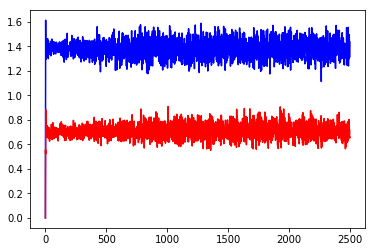

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(d_error_plt, 'b')
plt.plot(g_error_plt, 'r')
filename = "results/" + dataAtts.fname + "/" + "error_growth.txt"
file = open(filename, "w")
file.write("Discriminator error: " + str(d_error_plt) + "\n")
file.write("\n\n\n")
file.write("Generator error: " + str(g_error_plt) + "\n")
file.close()

plt.savefig('images/'+ dataAtts.fname + "/"+ 'error.png')
plt.show()
plt.clf()